# 项目一的笔记

这是在做完第一个项目之后整理出的笔记, 它包括了从数据清洗, 模型构造到模型评估等一些列的流程.   
做这个笔记的目的一是为了复习和巩固这个项目的内容, 二是熟悉Numpy, Pandas, Matplotlib和Scikit-learn的一些基本用法, 再是回顾简单的机器学习模型构建的整个流程.

# 一. 数据清洗
一般来讲, 我们获取的原始数据或多或少不是那么完美. 例如, 存在缺失值, 存在一些噪点(即异常值, 例如一个人的身高为10米)等等. 这时候, 我们不能拿这个数据直接使用, 而是要进行一些数据的清洗等等. 这本项目中, 对于我们来说, 数据已经是"干净"的了. 因为项目的设计者已经对数据做了基本的处理. 
对于数据的说明如下:

此项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Housing)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

因为这是一个非常入门的项目, 所以有很多步骤都被省略了. 例如上面说的数据的清洗, 还有这里的特征的选择等等. 我们直接使用`'RM'`， `'LSTAT'`和`'PTRATIO'`作为特征, 移除其他的特征.

In [49]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd

########################################
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit
#######################################

# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv') # 读取csv格式的数据, 返回一个DataFrame对象

# 将data的MEDV这一列的数据保存到price中, 是一个Series对象
prices = data['MEDV']

# 拷贝data对象, 并且去出MEDV这一列, 保存到features中, 他是一个DataFrame对象, 内容是特征的值
features = data.drop('MEDV', axis = 1)

# 完成
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


更多关于`pd.read_csv()`可以参考[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

# 二. 数据分析
在上一节中我们已经完成了数据的清洗, 并且数据集已经被我们分成了**特征(features)**和**目标变量(target variable)**。**特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。**目标变量**：` 'MEDV'`，是我们希望预测的变量。它们分别被存在`features`和`prices`两个变量名中。  
在这一节中我们来对数据进行一些简单的分析. 

## 基础统计信息
现在我们来算一下房价数据基本的统计信息.

In [53]:
# 计算房价的最小值
minimum_price = prices.min() # 也可以使用 np.min(prices)

# 计算房价的最大值
maximum_price = prices.max() # 也可以使用 np.max(prices)

# 计算房价的平均值
mean_price = prices.mean() # 也可以使用 np.mean(prices)

# 计算房价的中值
median_price = prices.median() # 也可以使用 np.median(prices)

# 计算房价的标准差
std_price = prices.std() # 也可以使用 np.std(prices)

#目标：输出计算的结果
print "房价数据的统计信息:"
print "最小值:\t ${:,.2f}".format(minimum_price)
print "最大值:\t ${:,.2f}".format(maximum_price)
print "均值:\t ${:,.2f}".format(mean_price)
print "中值:\t ${:,.2f}".format(median_price)
print "标准差:\t ${:,.2f}".format(std_price)

房价数据的统计信息:
最小值:	 $105,000.00
最大值:	 $1,024,800.00
均值:	 $454,342.94
中值:	 $438,900.00
标准差:	 $165,340.28


## 特征观察
在了解了目标变量即房价的各种统计信息之后, 我们再来看一看特征的信息. 这里我们主要观察每个特征与目标变量的关系.
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。
这里我们使用matplotlib来画出对应的散点图来观察.

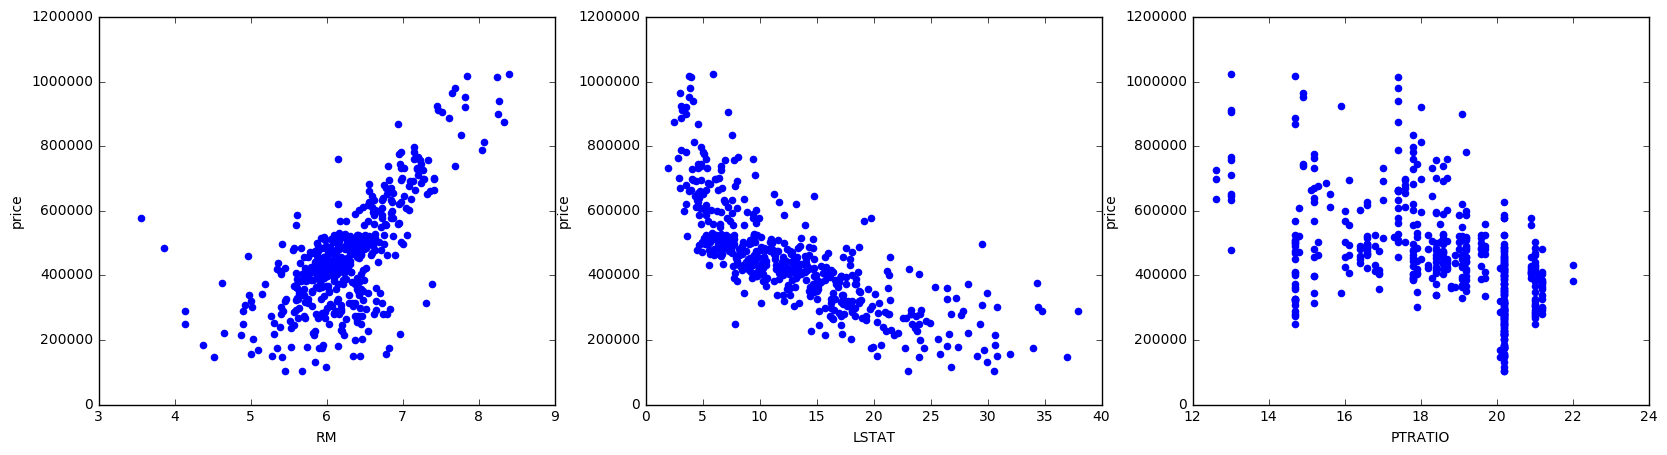

In [54]:
# 让结果在notebook中显示
%matplotlib inline
# 导入Matplotlib
import matplotlib.pyplot as plt
# 设置图的大小为20 x 5
plt.figure(figsize=(20, 5))
# 对于每一个特征都绘制出其与目标变量的散点图
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.scatter(features[col], prices, color='b')
    plt.xlabel(col)
    plt.ylabel("price")

通过散点图我们可以较为清晰地观察出`'RM'`, `'LSTAT'`分别与房价的关系. 但是对于`'PTRATIO'`来说, 就不是那么明显了.

# 三. 定义评估标准
数据初步分析, 特征观察之后, 我们就要开始准备建模了. 建模之前, 我们需要定义一个标准去衡量我们模型的表现. 这里, 我么选择[$R^2$matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).   
关于衡量标准的选择, 可以参考这篇文章:[Metrics To Evaluate Machine Learning Algorithms in Python](http://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/)

如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中我们实现：
- 使用 `sklearn.metrics` 中的 `r2_score` 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

如果不知道该如何使用`r2_score`, 我们可以查看[官方文档](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [44]:
# 从sklearn.metrics中导入r2_score
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

下面, 我们来使用刚才写好的`performance_metric`来测试一个例子,假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

In [55]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


# 四. 数据集的切分
定义好评估标准之后, 我们要对数据集进行切分, 分为训练集和测试集. 这样我们就可以使得训练数据集和评估数据集是独立的, 而且还可以帮助我们检验我们的模型是否存在过拟合. 
更多关于为何要分为训练集和测试集, 可参考:  [Why Data Scientists Split Data into Train and Test](http://info.salford-systems.com/blog/bid/337783/Why-Data-Scientists-Split-Data-into-Train-and-Test)

现在我们来实现数据集的切分。通常在这个过程中，数据也会被重新排序，以消除数据集中由于排序而产生的偏差。
- 使用 `sklearn.cross_validation` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
- 最终分离出的子集为`X_train`,`X_test`,`y_train`,和`y_test`。

In [56]:
# 从sklearn.cross_validation中导入train_test_split
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=11)
print "Training and testing split was successful."

Training and testing split was successful.


# 五. 模型分析
## 学习曲线
这一节我们来看看学习曲线. 代码部分已经在[visuals.py](visuals.py)中实现好了. 学习曲线可以帮助我们快速了解哪些模型是欠拟合哪些模型是过拟合. 这里我们用的模型是`Descision Tree Regressor`, 四个不同的模型主要区别在于它们的`max_depth`参数不同. 每一条曲线都直观的显示了随着训练数据量的增加，模型学习曲线的训练评分和测试评分的变化。注意，曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。这个模型的训练和测试部分都使用$R^2$来评分。

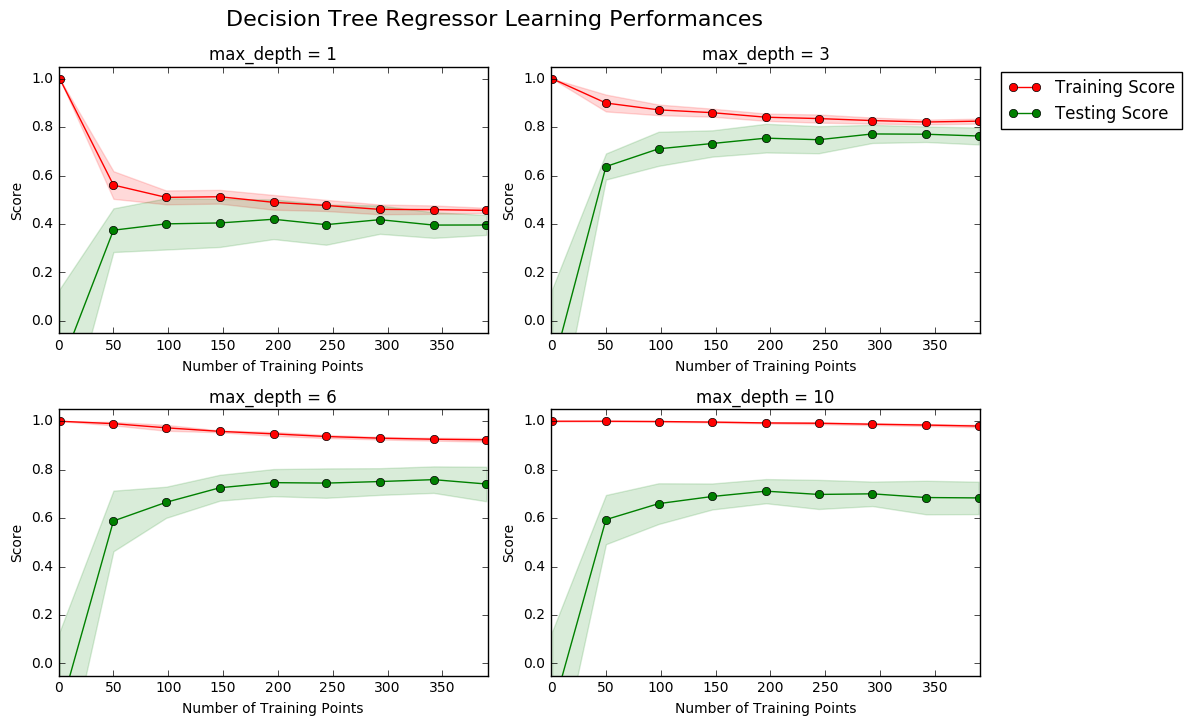

In [57]:
vs.ModelLearning(features, prices)

从上面的四个学习曲线我们可以看到, 当`max_depth`太大时(6, 10)模型处于一个过拟合的状态; 当`max_depth`太小时(1), 模型处于一个欠拟合的状态.

## 复杂度曲线
下面这幅图展示了十个不同的模型(`max_depth=1,2,3,...,10`)的表现. 跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

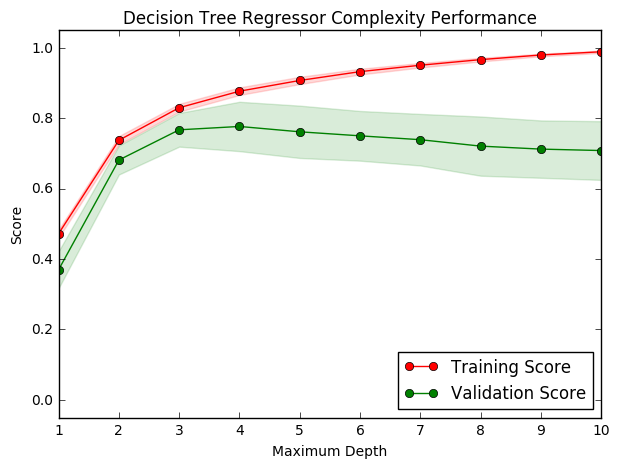

In [58]:
vs.ModelComplexity(X_train, y_train)

从上图我们大致可以猜测当`max_depth=4`时, 模型表现地最好.

# 六. 建模
这一节我们终于要自己动手建模了, 但在正式建模之前, 我们先了解一下什么是网格搜索和K折交叉验证.
## 网格搜索(Grid Search)

## 交叉验证(K-Fold Cross-Validation)

## 模型训练
在最后一个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了保证你得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

此外，你会发现你的实现使用的是 `ShuffleSplit()` 。它也是交叉验证的一种方式（见变量 `'cv_sets'`）。虽然这不是**问题8**中描述的 K-Fold 交叉验证，这个教程验证方法也很有用！这里 `ShuffleSplit()` 会创造十个混洗过的集合，每个集合中20%(`'test_size'`)的数据会被用作**验证集**。当你在实现的时候，想一想这跟 K-Fold 交叉验证有哪些相同点，哪些不同点？

在下方 `fit_model` 函数中，你需要做的是：
- 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数；
  - 将这个回归函数储存到 `'regressor'` 变量中；
- 为 `'max_depth'` 创造一个字典，它的值是从1至10的数组，并储存到 `'params'` 变量中；
- 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
  - 将 `performance_metric` 作为参数传至这个函数中；
  - 将评分函数储存到 `'scoring_fnc'` 变量中；
- 使用 `sklearn.grid_search` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) 创建一个网格搜索对象；
  - 将变量`'regressor'`, `'params'`, `'scoring_fnc'`, 和 `'cv_sets'` 作为参数传至这个对象中；
  - 将 `GridSearchCV` 存到 `'grid'` 变量中。
  
如果有同学对python函数如何传递多个参数不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [62]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor =  DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


# 七. 使用模型进行预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [63]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $407,480.77
Predicted selling price for Client 2's home: $225,642.86
Predicted selling price for Client 3's home: $892,850.00


一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [64]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### 可选问题 - 预测北京房价

（本题结果不影响项目是否通过）通过上面的实践，相信你对机器学习的一些常用概念有了很好的领悟和掌握。但利用70年代的波士顿房价数据进行建模的确对我们来说意义不是太大。现在你可以把你上面所学应用到北京房价数据集中`bj_housing.csv`。

免责声明：考虑到北京房价受到宏观经济、政策调整等众多因素的直接影响，预测结果仅供参考。

这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

你可以参考上面学到的内容，拿这个数据集来练习数据分割与重排、定义衡量标准、训练模型、评价模型表现、使用交叉验证对参数进行调优并选出最佳参数，比较两者的差别，最终得出最佳模型对验证集的预测分数。

In [1]:
### 你的代码



你成功的用新的数据集构建了模型了吗？他能对测试数据进行验证吗？它的表现是否符合你的预期？交叉验证是否有助于提升你模型的表现？

**答案：**